In [138]:
import pandas as pd
import numpy as np
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator

In [139]:
# Link to dataset
url = 'https://www.bundesnetzagentur.de/SharedDocs/Downloads/DE/Sachgebiete/Energie/Unternehmen_Institutionen/E_Mobilitaet/Ladesaeulenregister_CSV.csv?__blob=publicationFile&v=42'

# Load data to a pandas dataframe
df = pd.read_csv(url, encoding='iso-8859-1', sep=';', skiprows=10)

# Visualize top two records
df.head(2)

,Betreiber,Straße,Hausnummer,Adresszusatz,Postleitzahl,Ort,Bundesland,Kreis/kreisfreie Stadt,Breitengrad,Längengrad,...,Public Key1,Steckertypen2,P2 [kW],Public Key2,Steckertypen3,P3 [kW],Public Key3,Steckertypen4,P4 [kW],Public Key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,smopi®,Albstraße,14,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",...,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN


In [140]:
# Deep_translator syntax
GoogleTranslator(source='auto', target='en').translate("Guten morgen") 

'Good morning'

In [141]:
# Translate column headers to English
df.rename(columns=lambda x: GoogleTranslator(source='auto', target='en').translate(x), inplace=True)

# Replace spaces with hyphens
df.rename(columns=lambda x: x.replace(" ","_"), inplace=True)

# View top 2 rows after translation
df.head(2)

,operator,Street,House_number,address_supplement,Postal_code,Ort,Federal_State,District/district-free_city,latitude,longitude,...,Public_Key1,Connector_Types2,P2_[kW],Public_Key2,Connector_Types3,P3_[kW],Public_Key3,Connector_Types4,P4_[kW],Public_Key4
0,Albwerk GmbH & Co. KG,Ennabeurer Weg,0,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,442398","9,659075",...,NaN,AC Steckdose Typ 2,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,smopi®,Albstraße,14,NaN,72535,Heroldstatt,Baden-Württemberg,Landkreis Alb-Donau-Kreis,"48,449353","9,672201",...,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN,AC Steckdose Typ 2,22,NaN


In [142]:
# Check data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   operator                     40674 non-null  object
 1   Street                       40674 non-null  object
 2   House_number                 40674 non-null  object
 3   address_supplement           5761 non-null   object
 4   Postal_code                  40674 non-null  int64 
 5   Ort                          40674 non-null  object
 6   Federal_State                40674 non-null  object
 7   District/district-free_city  40674 non-null  object
 8   latitude                     40674 non-null  object
 9   longitude                    40674 non-null  object
 10  commissioning_date           40674 non-null  object
 11  connected_load               40674 non-null  object
 12  Type_of_charging_device      40673 non-null  object
 13  number_of_charging_points    40

In [143]:
# Replace previous wrong translation
df.rename(columns={'road':'street','Ort':'Place'},inplace =True)

# Replace existing names with translations
df.Type_of_charging_device.replace({'Normalladeeinrichtung':'Normal','Schnellladeeinrichtung':'Fast'} ,inplace=True)

# Replace operator value Privatperson with Private_person
df.operator.replace(dict.fromkeys(['Privatperson'],'Private_person'),inplace=True)

# Return the index of the values with null
null_values = df.Type_of_charging_device[df.Type_of_charging_device.isna()].index

# View the power
print(df['P1_[kW]'].iloc[null_values])

627    180
Name: P1_[kW], dtype: object


In [144]:
# Replace null value with 'Fast'
df.Type_of_charging_device.replace([np.nan],['Fast'], inplace = True)

# Confirm there are only two values as expected
print(df.Type_of_charging_device.unique())

['Normal' 'Fast']


In [145]:
# Replace null values by 0
columns_na = ['Connector_Types1', 'P1_[kW]', 'Connector_Types2', 'P2_[kW]',
               'Connector_Types3', 'P3_[kW]', 'Connector_Types4', 'P4_[kW]']

for column in columns_na:
    df[column] = df[column].fillna(value='0')
    
# Drop public keys
df.drop(columns=['Public_Key1', 'Public_Key2', 'Public_Key3', 'Public_Key4'], inplace=True)

# View null values
df.isnull().sum()

operator                           0
Street                             0
House_number                       0
address_supplement             34913
Postal_code                        0
Place                              0
Federal_State                      0
District/district-free_city        0
latitude                           0
longitude                          0
commissioning_date                 0
connected_load                     0
Type_of_charging_device            0
number_of_charging_points          0
Connector_Types1                   0
P1_[kW]                            0
Connector_Types2                   0
P2_[kW]                            0
Connector_Types3                   0
P3_[kW]                            0
Connector_Types4                   0
P4_[kW]                            0
dtype: int64

In [147]:
df['P4_[kW]'][df['P4_[kW]'].str.endswith(' ')].index

Int64Index([19335], dtype='int64')

In [136]:
df['P4_[kW]'].str.replace(',','.').astype('float')

0         0.0
1        22.0
2         0.0
3         0.0
4         0.0
         ... 
40669     0.0
40670     0.0
40671     0.0
40672     0.0
40673     0.0
Name: P4_[kW], Length: 40674, dtype: float64

AttributeError: Can only use .str accessor with string values!

In [110]:
# One latitude has a dot at the end, remove it
df['latitude'] = df.latitude.apply(lambda x: str(x).rstrip('.'))

# P2_[kW] has a forward slash,split on it and keep the first value
df['P2_[kW]'] = df['P2_[kW]'].apply(lambda x: str(x).split('/', 1)[0])

# P3_[kW] has a forward slash, split on it and keep the first value
df['P3_[kW]'] = df['P3_[kW]'].apply(lambda x: str(x).split('/', 1)[0])

# P4_[kW] has a value with multiple spaces, fill with 0
#df.loc[df['P4_[kW]'].str.startswith(' '), 'P4_[kW]'] = 0

# Replace comma with dot and parse the data type to float
type_replace = ['latitude','longitude', 'connected_load', 'P1_[kW]','P2_[kW]','P3_[kW]','P4_[kW]']

for col in type_replace:
    df[col] = df[col].str.replace(',','.').astype('float')
    
# Parse commisioning date to datetime
df['commissioning_date'] = pd.to_datetime(df['commissioning_date'], format='%d.%m.%Y')

In [97]:
# Select columns with object data type
string_data = df.select_dtypes(include='object').columns

# Remove leading and lagging spaces
for column in string_data:
    df[column] = df[column].str.strip()
    
# Fill null Federal_state value with its respective value 
df.loc[df['Federal_State'].isna(), 'Federal_State'] = 'Mecklenburg-Vorpommern'
    
# Confirm there are no spaces, leading or lagging white spaces in 'Place'
(df.Place.str.startswith(' ') | df.Place.str.endswith(' ')).any()

False

In [98]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40674 entries, 0 to 40673
Data columns (total 22 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   operator                     40674 non-null  object        
 1   Street                       40674 non-null  object        
 2   House_number                 40674 non-null  object        
 3   address_supplement           5761 non-null   object        
 4   Postal_code                  40674 non-null  int64         
 5   Place                        40674 non-null  object        
 6   Federal_State                40674 non-null  object        
 7   District/district-free_city  40674 non-null  object        
 8   latitude                     40674 non-null  float64       
 9   longitude                    40674 non-null  float64       
 10  commissioning_date           40674 non-null  datetime64[ns]
 11  connected_load               40674 non-nu

In [99]:
df.dtypes

operator                               object
Street                                 object
House_number                           object
address_supplement                     object
Postal_code                             int64
Place                                  object
Federal_State                          object
District/district-free_city            object
latitude                              float64
longitude                             float64
commissioning_date             datetime64[ns]
connected_load                        float64
Type_of_charging_device                object
number_of_charging_points               int64
Connector_Types1                       object
P1_[kW]                               float64
Connector_Types2                       object
P2_[kW]                                object
Connector_Types3                       object
P3_[kW]                                object
Connector_Types4                       object
P4_[kW]                           

In [91]:
# Check for duplicates for Berlin
df.Place[df.Place.str.contains('Berlin')].unique()

array(['Berlin', 'Berlin-Pankow', 'Berlin (Tempelhof)',
       'Berlin Osterpreussen', 'Berlin-Lichterfelde', 'Berlin-Köpenick',
       'Berlin-Marzahn-Hellersdorf', 'Berlin Marzahn',
       'Berlin-Friedrichsfelde', 'Berlin-Reinickendorf', 'Berlin-Spandau',
       'Neuenhagen bei Berlin', 'Berlin Hönow', 'Rüdersdorf bei Berlin'],
      dtype=object)

In [92]:
# Scrap a table containing German cities
html_data = requests.get('http://www.citymayors.com/gratis/german_topcities.html').text

# Extract the relevant tables
soup = BeautifulSoup(html_data, "html.parser")
data = pd.read_html (str(soup))
df_cities = data[1]

# Assign first row to column names
df_cities.columns = df_cities.iloc[0]

# Top 15 cities
df_top_cities = df_cities.iloc[1:16,:]
df_top_cities.head(2)

,Rank,City,State,Population
1,1,Berlin,Berlin,3275000
2,2,Hamburg,Hamburg,1686100


In [93]:
# Create a nested list of top cities and their duplicates
city_duplicates = []
for city in df_top_cities.City:
    city_duplicates.append(list((city,df.Place[df.Place.str.contains(city)].unique())))

#Display the second city(index 1)
city_duplicates[1]

['Hamburg',
 array(['Hamburg', 'Hamburg-Wilhelmsburg', 'Hamburg-Wandsbeck',
        'Hamburg-Duvenstedt', 'Hamburg-Eidelstedt', 'Hamburg/ Moorfleet',
        'Wentorf bei Hamburg'], dtype=object)]

In [56]:
# Replace the city regions with the name of main city; exclude Frankfurt and Essen
for l in city_duplicates:
    if l[0] not in ['Frankfurt', 'Essen']:
        df.replace(dict.fromkeys(list(l[1]),l[0]),inplace=True)

In [57]:
# Unique values with frankfurt in their names
df.Place[df.Place.str.contains('Frankfurt')].unique()

array(['Frankfurt (Oder)', 'Frankfurt/Oder', 'Frankfurt',
       'Frankfurt am Main', 'Frankfurt-Nieder-Eschbach',
       'Frankfurt-Niederrad'], dtype=object)

In [60]:
# Check for places containing Essen in their name
df.Place[df.Place.str.contains('Essen')].unique()

array(['Essenbach', 'Essenbach/Oberahrain', 'Essen', 'Addrup-Essen/Oldb.',
       'Essen (Oldenburg)', 'Bad Essen', 'Essen-Altenessen',
       'Essen-Kettwig', 'Essenheim'], dtype=object)

In [61]:
# Replace relevant duplicates containing frankfurt
df.Place.replace(dict.fromkeys(['Frankfurt','Frankfurt am Main', 
                    'Frankfurt-Nieder-Eschbach','Frankfurt-Niederrad'], 'Frankfurt'),inplace=True)

# Replace reelvant duplicates containing EsSen in them
df.Place.replace(dict.fromkeys(['Essen-Kettwig','Essen'], 'Essen'),inplace=True)

In [63]:
df.duplicated().sum()

5419

In [ ]:
#df.to_csv('Power.csv')

## 1. Number of Charging stations by Federal State

Text(0, 0.5, 'Number')

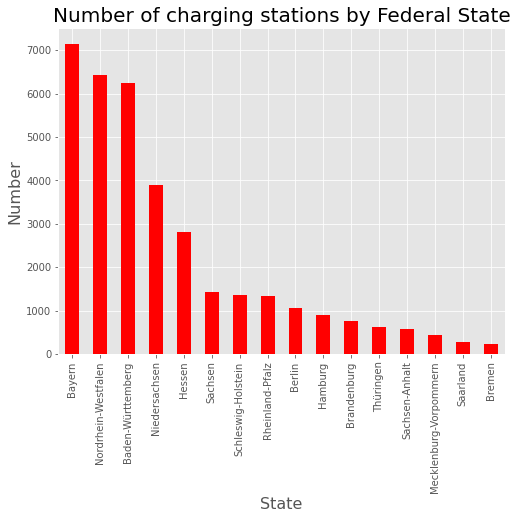

In [63]:
%matplotlib inline
plt.style.use('ggplot')

# number of charging station per federal state
df.Federal_State.value_counts().plot(kind='bar', color='red', figsize=(8,6))

# title and labels
plt.title('Number of charging stations by Federal State', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

Number of charging  stations by city

Text(0, 0.5, 'Number')

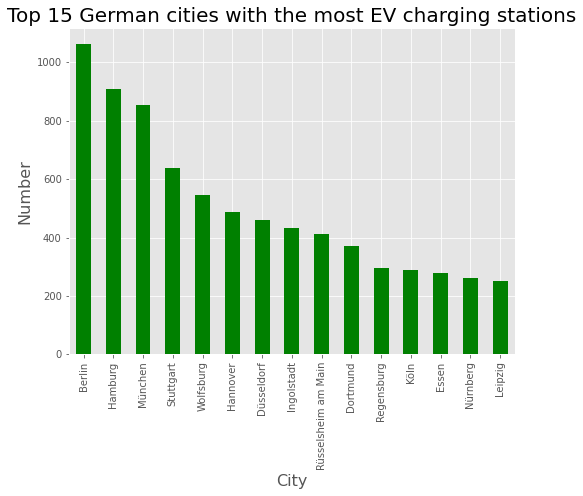

In [64]:
# German cities with the most EV charging stations
df.Place.value_counts().head(15).plot(kind='bar', color='green', figsize=(8,6))

# Title and labels
plt.title('Top 15 German cities with the most EV charging stations', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

## Lets check with reference to our list of top 15 cities

In [65]:
#List of top cities in germany
df[df.Place.isin(top_cities)].head(3)

,operator,road,House_number,address_supplement,postal_code,Place,Federal_State,District/district-free_city,latitude,longitude,...,Type_of_charging_device,number_of_charging_points,Connector_Types1,P1_[kW],Connector_Types2,P2_[kW],Connector_Types3,P3_[kW],Connector_Types4,P4_[kW]
44,Privatperson,Weiltinger Str.,22,Parkdeck,90449,Nürnberg,Bayern,Kreisfreie Stadt Nürnberg,49.423280,11.023120,...,Normalladeeinrichtung,1,AC Steckdose Typ 2,12.0,NaN,NaN,NaN,NaN,NaN,NaN
51,Euromaster,Implerstr.,19,NaN,81371,München,Bayern,Kreisfreie Stadt München,48.121908,11.550118,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN
52,Euromaster,Implerstr.,19,NaN,81371,München,Bayern,Kreisfreie Stadt München,48.121908,11.550118,...,Normalladeeinrichtung,2,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,NaN,NaN,NaN,NaN


Text(0, 0.5, 'Number')

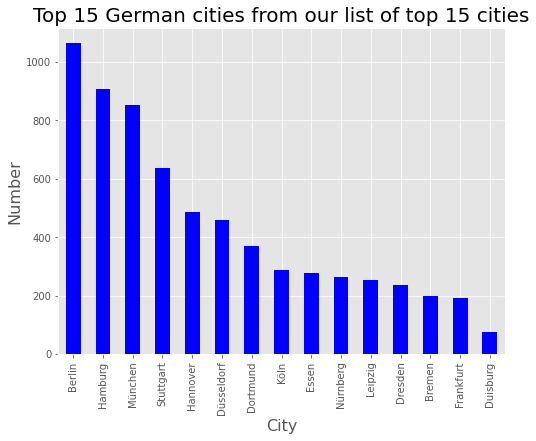

In [66]:
df_topcities= df[df.Place.isin(top_cities)]
# top German cities with the most EV charging stations
df_topcities.Place.value_counts().plot(kind='bar', color='blue', figsize=(8,6))


# title and labels
plt.title('Top 15 German cities from our list of top 15 cities', fontsize=20)
plt.xlabel('City', fontsize=16)
plt.ylabel('Number', fontsize=16)

Cities with many charging points which are not in our list: 'Wolsburg',
    'Rüsselsheim am Main','regensburg'

## Number of charging points

Text(0, 0.5, '')

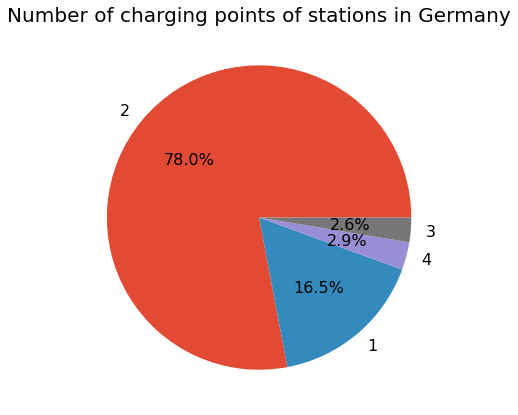

In [67]:
# number of charging points of stations in Germany - pie chart
df['number_of_charging_points'].value_counts().plot(kind='pie', figsize=(7,7), autopct='%1.1f%%', fontsize=16)

# labels and title
plt.title('Number of charging points of stations in Germany', fontsize=20)
plt.ylabel('')

In [68]:
df['number_of_charging_points'].value_counts()

2    27710
1     5853
4     1047
3      926
Name: number_of_charging_points, dtype: int64

## number of charging points by city

Text(0, 0.5, 'Number')

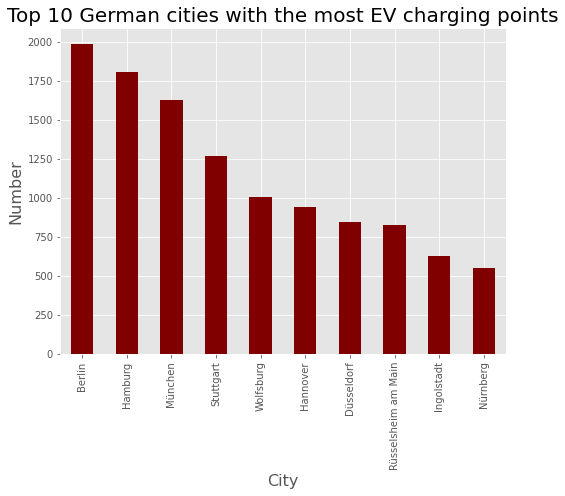

In [69]:
# top 10 German cities with the most EV charging points
df.groupby('Place').sum().number_of_charging_points.sort_values(ascending=False).head(10).plot(kind='bar', color='maroon', figsize=(8,6))

# title and labels
plt.title('Top 10 German cities with the most EV charging points',fontsize=20)
plt.xlabel('City',fontsize=16)
plt.ylabel('Number',fontsize=16)

## Number of stations installed per year

In [70]:
df.Federal_State[df['commissioning_date'].dt.year <2007]

89       Baden-Württemberg
841                 Bayern
34342    Baden-Württemberg
Name: Federal_State, dtype: object

In [71]:
#drop commision dates before 2000 which are invalid
df.drop(df[df['commissioning_date'].dt.year <2007].index,inplace =True)

Text(0, 0.5, 'Number')

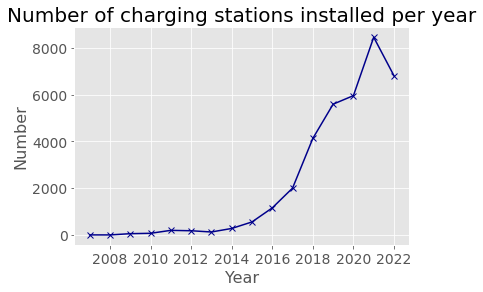

In [72]:
# number of new charging stations installed per year
df['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='line', color='darkblue',marker='x')

# modify ticks size
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

# title and labels
plt.title('Number of charging stations installed per year',fontsize=20)
plt.xlabel('Year',fontsize=16)
plt.ylabel('Number',fontsize=16)

we seem to have a value which is off.Lets investigate

In [73]:
df.commissioning_date[df['commissioning_date'].dt.year <2008]

25513   2007-05-01
33329   2007-12-21
Name: commissioning_date, dtype: datetime64[ns]

## Lets investigate the power of charging points

We know tht the charging time depends on the power of the charging point.

Charging Time [h] = Battery Capacity [kwh] / Charging Power [kw]

In [74]:
p1, p2, p3, p4 = df['P1_[kW]'], df['P2_[kW]'], df['P3_[kW]'], df['P4_[kW]']
# series that contains the power of all charging points in Germany
charging_points = pd.concat([p1, p2, p3, p4])
c=charging_points
print('the shape',charging_points.shape)
# remove entries equal to 0 
charging_points = charging_points[charging_points != 0]
# Number of charging points by power of charging points
common_points = charging_points.value_counts().head(10)
common_points

the shape (142132,)


22.0     46140
11.0     10206
50.0      2449
150.0     2273
300.0     2215
43.0      1218
3.7        548
350.0      470
75.0       418
250.0      346
dtype: int64

In [75]:
charging_points.max()

360.0

## Distribution of charging points by power

Text(0, 0.5, '')

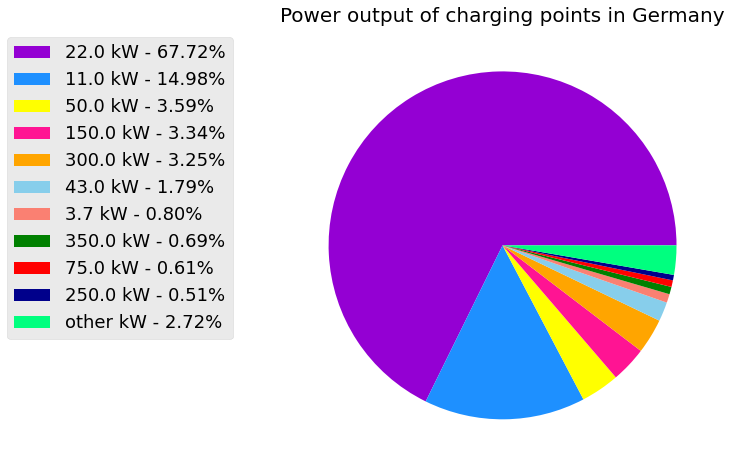

In [76]:
#common charging points (Top 10)
num_charging_points = charging_points.count()
other_power = num_charging_points - common_points.sum()

# include other in the most common power output series
common_points.at['other'] = other_power

# define colors of the pie plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# pie plot showing power output of charging points in Germany
common_points.plot(kind='pie', figsize=(8, 8), labels=None, colors=colors, fontsize=16)

# legend  - percentage of charging points 
labels = ['{} kW - {:.2%}'.format(index, common_points.loc[index]/num_charging_points) for index in common_points.index]
plt.legend(labels, loc='best', bbox_to_anchor=(-0.1, 1.), fontsize=18)

# labels and title
plt.title('Power output of charging points in Germany', fontsize=20)
plt.ylabel('')


In [77]:
common_points.value_counts()

46140    1
10206    1
2449     1
2273     1
2215     1
1218     1
548      1
470      1
418      1
346      1
1854     1
dtype: int64

Top power charging points (>300kW)

In [78]:
print('Number of 300kW:',(charging_points == 300.0).sum())

# number of charging points of 320 kW in operation 
print('Number of 320KW:',(charging_points == 320.0).sum())
# 10

# number of charging points of 350 kW in operation 
print('Number of 350kW:',(charging_points == 350.0).sum())

print('Total ultra rapid charging points:', )

Number of 300kW: 2215
Number of 320KW: 77
Number of 350kW: 470
Total ultra rapid charging points:


number of ultra fast charging points and station

In [79]:
# charging stations with at least one ultra-rapid charging point (>300kW)
ultra_fast_stations = df[(df['P1_[kW]']>=300.0) | (df['P2_[kW]']>=300.0) | (df['P3_[kW]']>=300.0) | (df['P4_[kW]']>=300.0)]

# number of charging stations with at least one ultra-rapid charging point
print('Number of stations with ultra charging points:',len(ultra_fast_stations))

Number of stations with ultra charging points: 1646


Text(0, 0.5, 'Number')

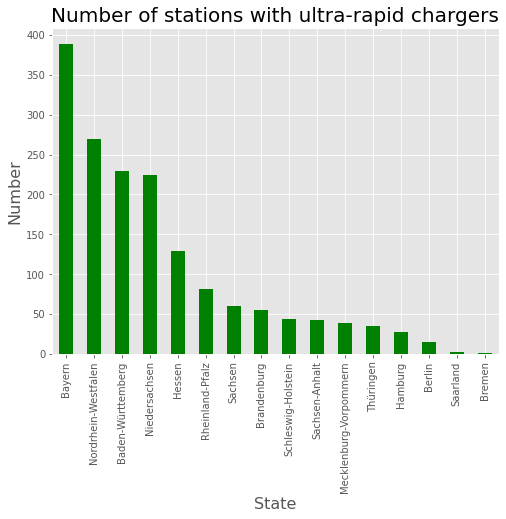

In [80]:
# number of charging station with ultra-rapid charger
ultra_fast_stations.Federal_State.value_counts().plot(kind='bar', color='green', figsize=(8,6))

# title and labels
plt.title('Number of stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('State', fontsize=16)
plt.ylabel('Number', fontsize=16)

Text(0, 0.5, 'Number')

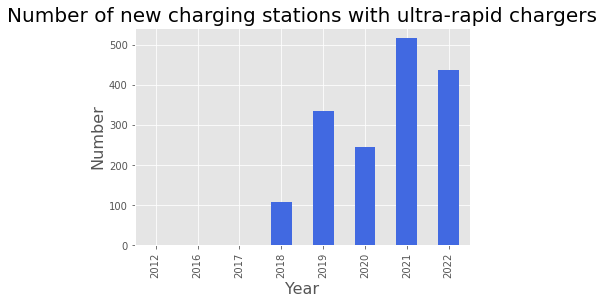

In [81]:
# number of new charging stations with ultra-rapid chargers
ultra_fast_stations['commissioning_date'].dt.year.value_counts().sort_index().plot(kind='bar', color='royalblue')


# title and labels
plt.title('Number of new charging stations with ultra-rapid chargers', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)

In [82]:
# first electric vehicle charging station in Germany
print('First charging station:', df['commissioning_date'].min())

# first charging station with an ultra-rapid charging point (>300kW) in Germany.
print('First ultra_fast station:',ultra_fast_stations['commissioning_date'].min())

First charging station: 2007-05-01 00:00:00
First ultra_fast station: 2012-06-16 00:00:00


Total Number of EVs in top german cities

In [106]:
date_city = df.groupby([df['commissioning_date'].dt.year, 'Place']).count()

# select a column and move the innermost level of the index to the columns
date_cities = date_city.operator.unstack()

# select the most populated cities in germany
date_cities = date_cities[top_cities[0:9]]

date_cities.head()

Place,Berlin,Hamburg,München,Köln,Frankfurt,Essen,Dortmund,Stuttgart,Düsseldorf
commissioning_date,,,,,,,,,
2007,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2009,23.0,NaN,NaN,NaN,4.0,13.0,10.0,NaN,NaN
2010,14.0,NaN,NaN,NaN,1.0,1.0,2.0,NaN,NaN
2011,23.0,NaN,NaN,NaN,NaN,12.0,19.0,NaN,7.0


In [103]:
df.groupby([df['commissioning_date'].dt.year, 'Place']).count().operator.unstack()[top_cities[0:9]]

operator  road  House_number  \
commissioning_date Place                                       
2007               Ludwigslust         1     1             1   
                   Weilach             1     1             1   
2008               Furtwangen          1     1             1   
2009               Berlin             23    23            23   
                   Dortmund           10    10            10   
...                                  ...   ...           ...   
2022               meppen              1     1             1   
                   Öhningen            2     2             2   
                   Öhringen            3     3             3   
                   Ötzingen            4     4             4   
                   Überherrn           1     1             1   

                                address_supplement  postal_code  \
commissioning_date Place                                          
2007               Ludwigslust                   0            1   
                   Weilach                       0            1   
2008               Furtwangen                    0            1   
2009               Berlin                       22           23   
                   Dortmund                      2           10   
...                                            ...          ...   
2022               meppen                        0            1   
                   Öhningen                      0            2   
                   Öhringen                      0            3   
                   Ötzingen                      0            4   
                   Überherrn                     0            1   

                                Federal_State  District/district-free_city  \
commissioning_date Place                                                     
2007               Ludwigslust              1                            1   
                   Weilach                  1                            1   
2008               Furtwangen               1                            1   
2009               Berlin                  23                           23   
                   Dortmund                10                           10   
...                                       ...                          ...   
2022               meppen                   1                            1   
                   Öhningen                 2                            2   
                   Öhringen                 3                            3   
                   Ötzingen                 4                            4   
                   Überherrn                1                            1   

                                latitude  longitude  commissioning_date  ...  \
commissioning_date Place                                                 ...   
2007               Ludwigslust         1          1                   1  ...   
                   Weilach             1          1                   1  ...   
2008               Furtwangen          1          1                   1  ...   
2009               Berlin             23         23                  23  ...   
                   Dortmund           10         10                  10  ...   
...                                  ...        ...                 ...  ...   
2022               meppen              1          1                   1  ...   
                   Öhningen            2          2                   2  ...   
                   Öhringen            3          3                   3  ...   
                   Ötzingen            4          4                   4  ...   
                   Überherrn           1          1                   1  ...   

                                Type_of_charging_device  \
commissioning_date Place                                  
2007               Ludwigslust                        1   
                   Weilach                            1   
2008               Furtwangen      

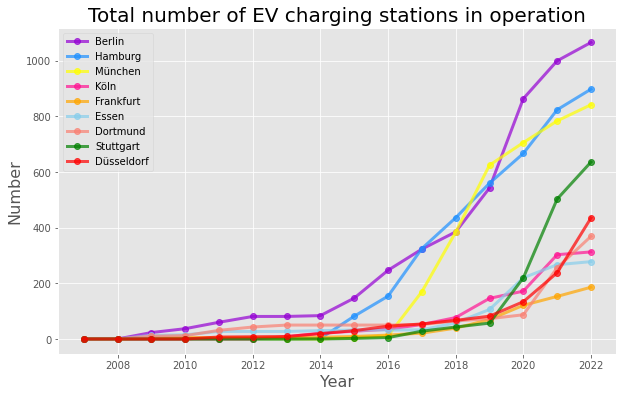

In [74]:
# define the colors for the line plot
colors = ['darkviolet', 'dodgerblue', 'yellow', 'deeppink', 'orange', 'skyblue', 'salmon', 'green', 'red', 'darkblue', 'springgreen']

# line plot showing the total number of EV charging station in operation over the years
date_cities.fillna(0.0).cumsum().plot(color=colors, marker='o', alpha=0.7, linewidth=3, figsize=(10,6))

# define the title and the labels
plt.title('Total number of EV charging stations in operation', fontsize=20)
plt.xlabel('Year', fontsize=16)
plt.ylabel('Number', fontsize=16)
plt.legend(loc='upper left')

In [107]:
date_cities.fillna(0.0).cumsum()

Place,Berlin,Hamburg,München,Köln,Frankfurt,Essen,Dortmund,Stuttgart,Düsseldorf
commissioning_date,,,,,,,,,
2007,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2009,23.0,0.0,0.0,0.0,4.0,13.0,10.0,0.0,0.0
2010,37.0,0.0,0.0,0.0,5.0,14.0,12.0,0.0,0.0
2011,60.0,0.0,0.0,0.0,5.0,26.0,31.0,0.0,7.0
2012,81.0,0.0,0.0,0.0,5.0,26.0,43.0,0.0,8.0
2013,81.0,0.0,0.0,8.0,5.0,26.0,50.0,0.0,9.0
2014,84.0,2.0,0.0,18.0,6.0,28.0,50.0,0.0,19.0
2015,146.0,82.0,5.0,25.0,9.0,30.0,50.0,2.0,30.0


Lets do some visualization on maps in my city berlin

In [75]:
import folium

# define a map centered around Berlin
berlin_map = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# display the map
berlin_map

Plot circle marker at charging points

In [76]:
# data frame containing only the charging stations located in Munich
df_berlin = df[df['Place'] == 'Berlin']

# create a map object of the city of Munich
berlin_markers = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# display charging stations using circle markers
for lat, lng in zip(df_berlin['latitude'], df_berlin['longitude']):
    folium.CircleMarker(
            [lat, lng],
            radius=4,
            color='purple',
            opacity=0.4,
            fill=True,
            fill_color='blue').add_to(berlin_markers)
    
berlin_markers

In [77]:
# number of charging points of stations in Berlin %
df_berlin.number_of_charging_points.value_counts(normalize=True)*100

2    76.266417
1    18.761726
3     3.752345
4     1.219512
Name: number_of_charging_points, dtype: float64

In [78]:
# create a map object of the city of Munich
berlin_markers_2 = folium.Map(location=[52.5200, 13.4050], zoom_start=12)

# define colors for the markers
colors = ['red', 'purple', 'orange', 'blue']

# display charging stations using circle markers
for lat, lng, number in zip(df_berlin['latitude'], df_berlin['longitude'], df_berlin['number_of_charging_points']):
    folium.CircleMarker(
            [lat, lng],
            radius=number*2,
            color=colors[number-1],
            opacity=0.5,
            fill=True,
            fill_color='blue').add_to(berlin_markers_2)
    
berlin_markers_2

In [79]:
# type of chargers - normal or fast
df.type_of_charger.unique()
# array(['fast', 'normal'], dtype=object)

#A charging station is considered fast if contains at least 1 charging point with a power output larger than 22kw
df[df.type_of_charger == 'Fast'][['P1_[kW]', 'P2_[kW]', 'P3_[kW]', 'P4_[kW]']].max(axis=1).unique()

array([ 50. , 150. , 300. , 100. ,  33. , 250. ,  62.5, 320. , 225. ,
       180. ,  24. ,  75. , 350. , 125. , 175. , 160. ,  44. ,  86. ,
        60. ,  43. ,  45. ,  25. , 230. ,  55. ,  36. ,  23. ,  62. ,
        53. ,  30. , 200. , 135. ,  78. ,  80. ,  32. , 120. ,  70. ,
        65. ,  93. ,  35. , 140. , 144. ,  90. , 184. , 130. ,  22.2,
        22.1, 112.5, 134. ,  72. , 185. ,  39. ,  27. , 280. , 156. ,
        40. , 145. ,  99. , 110. , 360. , 272. ,  98. ,  76.5, 270. ,
       146. , 149. ])

In [80]:
# number of charging stations with at least one charging point with a power output >22kw
len(df_berlin[df_berlin.type_of_charger == 'Fast'])

129

In [81]:
df.columns

Index(['operator', 'Street', 'House_number', 'address_supplement',
       'postal_code', 'Place', 'Federal_State', 'District/district-free_city',
       'latitude', 'longitude', 'commissioning_date', 'connected_load',
       'type_of_charger', 'number_of_charging_points', 'Connector_Types1',
       'P1_[kW]', 'Connector_Types2', 'P2_[kW]', 'Connector_Types3', 'P3_[kW]',
       'Connector_Types4', 'P4_[kW]'],
      dtype='object')

## companies incharge of charging stations

In [82]:
df['operator'].value_counts().head(10)

EnBW mobility+ AG und Co.KG    1948
E.ON Drive GmbH                1108
EWE Go GmbH                     798
Westenergie Metering GmbH       722
VW Group Charging GmbH          652
Stromnetz Hamburg GmbH          603
SWM Versorgungs GmbH            598
Allego GmbH                     594
ALDI SÜD                        533
Audi AG                         533
Name: operator, dtype: int64

In [83]:
df.Federal_State[df.operator=='EnBW mobility+ AG und Co.KG'].unique()

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [84]:
states =df.Federal_State.unique()

In [85]:
states

array(['Baden-Württemberg', 'Bayern', 'Berlin', 'Brandenburg', 'Bremen',
       'Hamburg', 'Hessen', 'Mecklenburg-Vorpommern', 'Niedersachsen',
       'Nordrhein-Westfalen', 'Rheinland-Pfalz', 'Saarland', 'Sachsen',
       'Sachsen-Anhalt', 'Schleswig-Holstein', 'Thüringen'], dtype=object)

In [86]:
#group by federal states and operator
df.groupby(['Federal_State','operator']).count()['number_of_charging_points'].sort_values(ascending=False).head(20)

Federal_State        operator                                     
Baden-Württemberg    EnBW mobility+ AG und Co.KG                      1083
Hamburg              Stromnetz Hamburg GmbH                            603
Bayern               SWM Versorgungs GmbH                              598
Berlin               Berliner Stadtwerke EnergiePartner GmbH           525
Niedersachsen        EWE Go GmbH                                       520
                     VW Group Charging GmbH                            485
Bayern               N-ERGIE Aktiengesellschaft                        480
Nordrhein-Westfalen  Westenergie Metering GmbH                         443
Bayern               E.ON Drive GmbH                                   426
Hessen               Energieservice Rhein-Main GmbH                    413
Bayern               Audi AG                                           363
Baden-Württemberg    Mercedes-Benz AG                                  357
Bayern               Mer Germany 

In [87]:
#the earliest companies in the charging infrastracture
df.groupby(['commissioning_date','operator']).count()['number_of_charging_points'].head(20)

commissioning_date  operator                          
2007-05-01          Stadtwerke Ludwigslust-Grabow GmbH     1
2007-12-21          IBH GmbH                               1
2008-07-19          EGT Energie GmbH                       1
2009-01-02          Energieversorgung Oberhausen AG        1
2009-05-20          E.ON Drive Infrastructure GmbH        11
                    Westenergie Metering GmbH              1
2009-06-12          E.ON Drive Infrastructure GmbH         5
2009-06-16          E.ON Drive Infrastructure GmbH         1
2009-07-13          Westenergie Metering GmbH              1
2009-07-14          E.ON Drive Infrastructure GmbH         4
2009-07-17          E.ON Drive Infrastructure GmbH         4
2009-07-28          E.ON Drive Infrastructure GmbH         9
2009-08-06          E.ON Drive Infrastructure GmbH         1
2009-09-08          E.ON Drive Infrastructure GmbH         3
2009-09-27          E.ON Drive Infrastructure GmbH         2
2009-10-12          E.ON Drive

In [88]:
#Some of the currently most active companies in the charging infrastracture
df.groupby(['commissioning_date','Federal_State','operator']).count()['number_of_charging_points'].tail(20)

commissioning_date  Federal_State           operator                                    
2022-09-29          Nordrhein-Westfalen     ALDI SÜD                                        1
                                            SWD AG                                          1
                    Rheinland-Pfalz         EWE Go GmbH                                     1
                    Sachsen                 ATM Reparaturzentrum                            1
                                            Stadtwerke Leipzig GmbH                         1
                    Schleswig-Holstein      EWE Go GmbH                                     1
2022-09-30          Baden-Württemberg       Filderstadtwerke                                3
                                            b2bEnergy GmbH                                  1
                    Bayern                  Gemeindewerke Wendelstein KU                    1
                    Mecklenburg-Vorpommern  GP JOULE Connect GmbH

EnBW mobility+ AG und Co.KG is operating in all 16 german states

In [89]:
#In the data set every charger type is recorded for each charging point
type_point_1 = df['Connector_Types1']
type_point_2 = df['Connector_Types2']
type_point_3 = df['Connector_Types3']
type_point_4 = df['Connector_Types4']

In [90]:
all_types = pd.concat([type_point_1,type_point_2,type_point_3,type_point_4])

In [91]:
type_point_1.value_counts()

AC Steckdose Typ 2                                                                  23473
DC Kupplung Combo                                                                    4272
AC Kupplung Typ 2                                                                    2464
AC Steckdose Typ 2, AC Schuko                                                        2265
DC Kupplung Combo, DC CHAdeMO                                                        1408
AC Steckdose Typ 2, AC Kupplung Typ 2                                                 598
AC Steckdose Typ 2, DC Kupplung Combo, DC CHAdeMO                                      69
AC Kupplung Typ 2, AC Schuko                                                           41
AC Steckdose Typ 2, DC Kupplung Combo                                                  18
AC Steckdose Typ 2, AC Kupplung Typ 2, AC Schuko                                       17
AC Steckdose Typ 2, AC CEE 5 polig                                                     15
AC Steckdo

In [92]:
df['Connector_Types2'][df['Connector_Types1']=='AC Steckdose Typ 2'].count()

23473

In [93]:
type_point_1.head()

0                AC Kupplung Typ 2
1               AC Steckdose Typ 2
2               AC Steckdose Typ 2
3               AC Steckdose Typ 2
4    AC Steckdose Typ 2, AC Schuko
Name: Connector_Types1, dtype: object

In [94]:
df.Connector_Types1

0                    AC Kupplung Typ 2
1                   AC Steckdose Typ 2
2                   AC Steckdose Typ 2
3                   AC Steckdose Typ 2
4        AC Steckdose Typ 2, AC Schuko
                     ...              
34717    DC Kupplung Combo, DC CHAdeMO
34718    DC Kupplung Combo, DC CHAdeMO
34719                DC Kupplung Combo
34720                DC Kupplung Combo
34721               AC Steckdose Typ 2
Name: Connector_Types1, Length: 34719, dtype: object

In [95]:
df.to_csv('Emobility.csv')

In [96]:
df.shape

(34719, 22)

In [97]:
df.tail()

,operator,Street,House_number,address_supplement,postal_code,Place,Federal_State,District/district-free_city,latitude,longitude,...,type_of_charger,number_of_charging_points,Connector_Types1,P1_[kW],Connector_Types2,P2_[kW],Connector_Types3,P3_[kW],Connector_Types4,P4_[kW]
34717,Aral Pulse,Aralallee,1,NaN,99441,Mellingen,Thüringen,Landkreis Weimarer Land,50.934670,11.389635,...,Fast,2,"DC Kupplung Combo, DC CHAdeMO",300.0,DC Kupplung Combo,300.0,0,0.0,0,0.0
34718,Aral Pulse,Aralallee,1,NaN,99441,Mellingen,Thüringen,Landkreis Weimarer Land,50.934670,11.389635,...,Fast,2,"DC Kupplung Combo, DC CHAdeMO",300.0,DC Kupplung Combo,300.0,0,0.0,0,0.0
34719,bft Tankstelle Christian Hollmotz,Dorfstr.,101,NaN,99510,Obertrebra,Thüringen,Landkreis Weimarer Land,51.060770,11.565560,...,Fast,2,DC Kupplung Combo,300.0,DC Kupplung Combo,300.0,0,0.0,0,0.0
34720,Thüringer Energie AG,Dorfstraße,101,NaN,99510,Obertrebra,Thüringen,Landkreis Weimarer Land,51.060798,11.565503,...,Fast,2,DC Kupplung Combo,150.0,DC Kupplung Combo,150.0,0,0.0,0,0.0
34721,IGW Ingenieurgesellschaft für Wasserkraftanlag...,Hauptstraße,6,NaN,99439,Wohlsborn,Thüringen,Landkreis Weimarer Land,51.032039,11.365736,...,Normal,2,AC Steckdose Typ 2,11.0,AC Steckdose Typ 2,22.0,0,0.0,0,0.0


In [98]:
df.columns

Index(['operator', 'Street', 'House_number', 'address_supplement',
       'postal_code', 'Place', 'Federal_State', 'District/district-free_city',
       'latitude', 'longitude', 'commissioning_date', 'connected_load',
       'type_of_charger', 'number_of_charging_points', 'Connector_Types1',
       'P1_[kW]', 'Connector_Types2', 'P2_[kW]', 'Connector_Types3', 'P3_[kW]',
       'Connector_Types4', 'P4_[kW]'],
      dtype='object')

In [99]:
all_types.head(10)

0                AC Kupplung Typ 2
1               AC Steckdose Typ 2
2               AC Steckdose Typ 2
3               AC Steckdose Typ 2
4    AC Steckdose Typ 2, AC Schuko
5    AC Steckdose Typ 2, AC Schuko
6               AC Steckdose Typ 2
7    AC Steckdose Typ 2, AC Schuko
8               AC Steckdose Typ 2
9               AC Steckdose Typ 2
dtype: object

In [100]:
all_types[all_types.str.contains('DC CHAdeMO')].head()

71     DC Kupplung Combo, DC CHAdeMO
72     DC Kupplung Combo, DC CHAdeMO
75     DC Kupplung Combo, DC CHAdeMO
76     DC Kupplung Combo, DC CHAdeMO
121    DC Kupplung Combo, DC CHAdeMO
dtype: object

In [109]:
charging_points.to_csv('Power.csv')

In [110]:
df.head()

,operator,Street,House_number,address_supplement,postal_code,Place,Federal_State,District/district-free_city,latitude,longitude,...,type_of_charger,number_of_charging_points,Connector_Types1,P1_[kW],Connector_Types2,P2_[kW],Connector_Types3,P3_[kW],Connector_Types4,P4_[kW]
0,EnBW mobility+ AG und Co.KG,Hauptstraße,91c,NaN,73340,Amstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.578534,9.874840,...,Fast,2,AC Kupplung Typ 2,43.0,"DC Kupplung Combo, DC CHAdeMO",50.0,0,0.0,0,0.0
1,SWU Energie GmbH,Lindenstraße,7,NaN,89176,Asselfingen,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.528983,10.193397,...,Normal,1,AC Steckdose Typ 2,22.0,0,0.0,0,0.0,0,0.0
2,SWU Energie GmbH,Öllengasse,10,NaN,89177,Ballendorf,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.553539,10.082678,...,Normal,1,AC Steckdose Typ 2,22.0,AC Steckdose Typ 2,22.0,0,0.0,0,0.0
3,SWU Energie GmbH,Sterngasse,6,NaN,88481,Balzheim,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.179959,10.076977,...,Normal,1,AC Steckdose Typ 2,22.0,0,0.0,0,0.0,0,0.0
4,EnBW mobility+ AG und Co.KG,Heuweg,12,NaN,89179,Beimerstetten,Baden-Württemberg,Landkreis Alb-Donau-Kreis,48.480387,9.980588,...,Normal,2,"AC Steckdose Typ 2, AC Schuko",22.0,"AC Steckdose Typ 2, AC Schuko",22.0,0,0.0,0,0.0
